## Sustainable Fashion - Data Analysis

In [1]:
## loading libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
def load_df(filepath):
    df = pd.read_csv(filepath)
    return df

In [3]:
# functions to generate the statistics
def calculate_mean(df, col):
    return df[col].mean() if col in df else None


def calculate_median(df, col):
    return df[col].median() if col in df else None


def calculate_std_dev(df, col):
    return df[col].std() if col in df and len(df[col]) > 1 else 0

In [4]:
# functions to generate charts
def bar_plot(
    dataframe, x_column, y_column, title, xlabel, ylabel, color="skyblue", rotation=45
):
    plt.figure(figsize=(12, 8))
    dataframe.plot(kind="bar", x=x_column, y=y_column, color=color, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(axis="y")
    plt.show()


def pie_chart(dataframe, column, title):
    plt.figure(figsize=(10, 10))
    dataframe[column].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140)
    plt.title(title)
    plt.ylabel("")
    plt.show()

In [5]:
# adding the parameters for the analysis
filepath = "sustainable_fashion_trends_2024.csv"
analysis_col = "Carbon_Footprint_MT"
x_col = "Country"
y_col = "Number of Brands"
plot_title = "Number of Sustainable Brands per Country"
xlabel = "Country"
ylabel = "Number of Brands"
pie_col = "Material_Type"
pie_title = "Distribution of Material Types"

In [6]:
# Generate statistics
def generate_statistics(df, analysis_col):
    # Calculating statistics
    mean = calculate_mean(df, analysis_col)
    median = calculate_median(df, analysis_col)
    std_dev = calculate_std_dev(df, analysis_col)

    # Creating a DataFrame for the markdown table
    stats_dict = {
        "Statistic": ["Mean", "Median", "Standard Deviation"],
        "Value": [mean, median, std_dev],
    }

    stats_df = pd.DataFrame(stats_dict)

    return stats_df

In [7]:
# generating the plots
def generate_plots(df, x_col, y_col, plot_title, xlabel, ylabel, pie_col, pie_title):
    # Plotting
    # Number of sustainable brands per country
    grouped_data = df.groupby(x_col).size().reset_index(name=y_col)
    bar_plot(
        grouped_data,
        x_col,
        y_col,
        plot_title,
        xlabel,
        ylabel,
        color="skyblue",
        rotation=45,
    )

    # Distribution of material types
    pie_chart(df, pie_col, pie_title)

In [8]:
# Loading the data
df = load_df(filepath)

In [9]:
# Call generate_statistics
generate_statistics(df, analysis_col)

,Statistic,Value
0,Mean,250.317550
1,Median,250.650000
2,Standard Deviation,142.802345


<Figure size 1200x800 with 0 Axes>

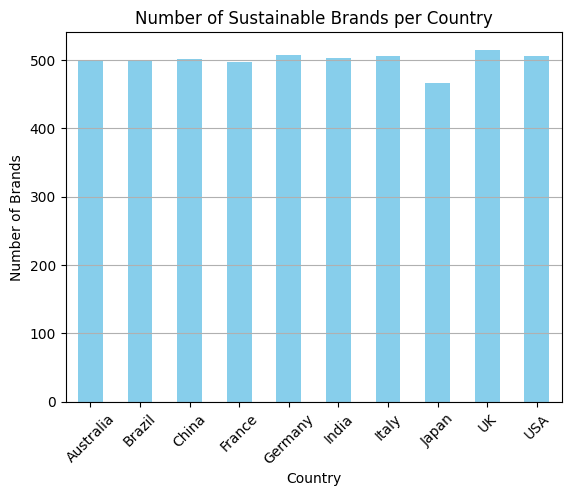

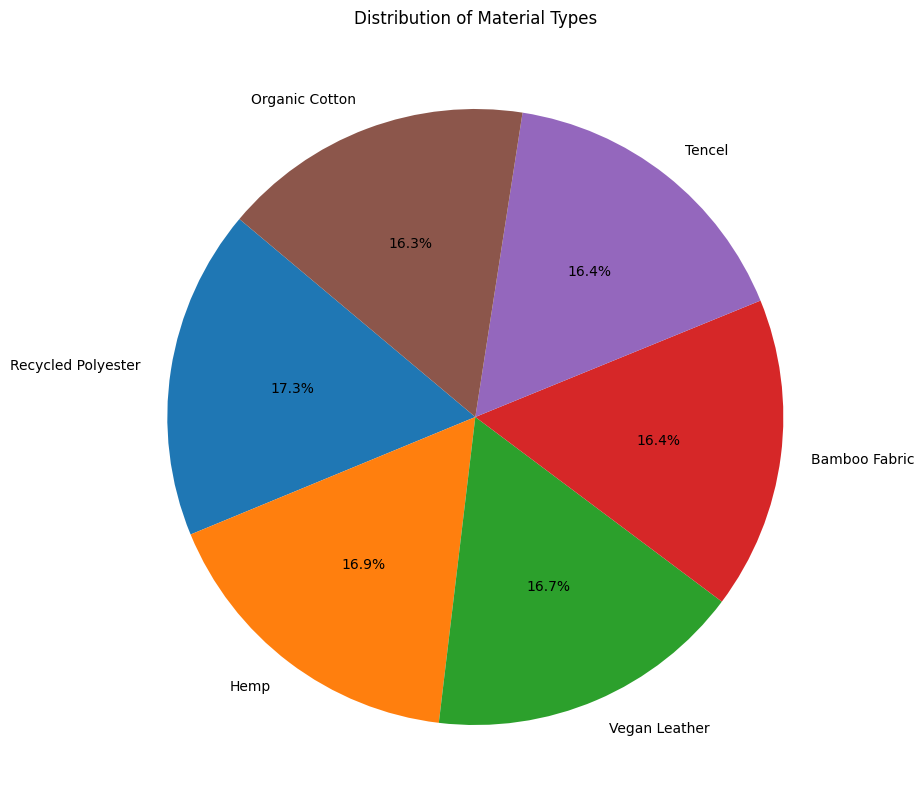

In [10]:
# Call generate_plots
generate_plots(df, x_col, y_col, plot_title, xlabel, ylabel, pie_col, pie_title)

In [11]:
# testing the functions
def test_calculate_mean():
    test_df = pd.DataFrame({"A": [1, 2, 3]})
    assert calculate_mean(test_df, "A") == 2.0


def test_calculate_median():
    test_df = pd.DataFrame({"A": [1, 2, 3]})
    assert calculate_median(test_df, "A") == 2.0


# Run the tests
test_calculate_mean()
test_calculate_median()
print("The tests were successful")

The tests were successful
